In \[ \]:

    !pip install tensorflow opencv-python mediapipe matplotlib scikit-learn

In \[ \]:

    #teste da biblioteca com função depreciada
    !pip install protobuf==4.25.3

In \[3\]:

    import cv2
    import numpy as np
    import os
    from matplotlib import pyplot as plt
    import time
    import mediapipe as mp

In \[4\]:

    mp_holistic = mp.solutions.holistic # Holistic model
    mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In \[5\]:

    def mediapipe_detection(image, model):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR to RGB devido ao OpenCV ler esse formato, porém o Mediapipe precisa de RGB
        image.flags.writeable = False                  # Image is no longer writeable
        results = model.process(image)                 # Make prediction
        image.flags.writeable = True                   # Image is now writeable 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
        return image, results

In \[6\]:

    def draw_styled_landmarks(image, results):
        # COLOCA OS TRAÇOS LIGANDO OS PONTOS CAPUTRADOS NO MODELO, 

        #TRAÇA AS LINHAS NA CARA
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),  #COR DO LANDMARK
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)  #COR DAS LINHAS
                                 ) 
        # DTRAÇA AS LINHAS NO COORPO
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 ) 
        # TRAÇA AS MÃO ESQUERDA
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 ) 
        # D TRAÇA AS MÃO DIREITA  
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 ) 

In \[ \]:

    cap = cv2.VideoCapture(0)
    # APLICANDO O MODELO DO MEDIAPIPE NA CAPTURA DA CÂMERA
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)
            
            # aplica os landsmarks
            draw_styled_landmarks(image, results)

            # Aplica os landsmarks na câmera para ficar visual a captura dos pontos
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

In \[67\]:

    #testar o frame capturado na camera
    #plt.imshow(frame)                                 #SEM CONVERTER A IMAGEM
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #CONVERTENDO A IMAGEM

Out\[67\]:

    <matplotlib.image.AxesImage at 0x24f387508f0>

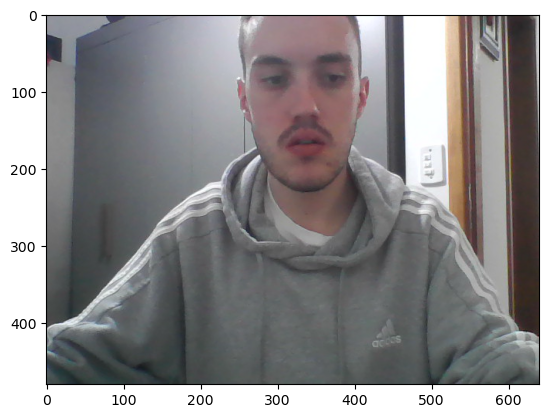

In \[9\]:

    # 3. Extract Keypoint Values
    results.pose_landmarks

Out\[9\]:

    landmark {
      x: 0.56654644
      y: 0.474516898
      z: -0.996194
      visibility: 0.999960721
    }
    landmark {
      x: 0.599392712
      y: 0.400907844
      z: -0.927960873
      visibility: 0.999914825
    }
    landmark {
      x: 0.618364215
      y: 0.403160751
      z: -0.927907944
      visibility: 0.999923
    }
    landmark {
      x: 0.636507869
      y: 0.406115085
      z: -0.927859664
      visibility: 0.999898791
    }
    landmark {
      x: 0.533760309
      y: 0.401358932
      z: -0.912773967
      visibility: 0.999914825
    }
    landmark {
      x: 0.51267606
      y: 0.404370576
      z: -0.911766708
      visibility: 0.999923944
    }
    landmark {
      x: 0.49351725
      y: 0.407448143
      z: -0.911689162
      visibility: 0.999916673
    }
    landmark {
      x: 0.669082522
      y: 0.443822771
      z: -0.520846546
      visibility: 0.999920726
    }
    landmark {
      x: 0.472169489
      y: 0.448189169
      z: -0.429622352
      visibility: 0.999936461
    }
    landmark {
      x: 0.608060777
      y: 0.557973921
      z: -0.853828311
      visibility: 0.999952197
    }
    landmark {
      x: 0.527633727
      y: 0.560011923
      z: -0.828405857
      visibility: 0.999953926
    }
    landmark {
      x: 0.834352612
      y: 0.871593177
      z: -0.36359638
      visibility: 0.997535527
    }
    landmark {
      x: 0.318633378
      y: 0.862445414
      z: -0.269684821
      visibility: 0.997372866
    }
    landmark {
      x: 1.03248513
      y: 1.32463443
      z: -0.660797417
      visibility: 0.087616846
    }
    landmark {
      x: 0.0578753129
      y: 1.22736299
      z: -0.944082439
      visibility: 0.486057371
    }
    landmark {
      x: 1.05876577
      y: 1.62881267
      z: -1.14697015
      visibility: 0.0909563303
    }
    landmark {
      x: 0.0492415316
      y: 0.846205115
      z: -2.12591362
      visibility: 0.47061798
    }
    landmark {
      x: 1.10091019
      y: 1.73722017
      z: -1.27470422
      visibility: 0.12910378
    }
    landmark {
      x: 0.0380303673
      y: 0.664439
      z: -2.34542322
      visibility: 0.459348
    }
    landmark {
      x: 1.0367142
      y: 1.70890796
      z: -1.2852633
      visibility: 0.208936334
    }
    landmark {
      x: 0.0955687314
      y: 0.590328932
      z: -2.28752041
      visibility: 0.523639858
    }
    landmark {
      x: 1.00423646
      y: 1.67938149
      z: -1.18184876
      visibility: 0.221613079
    }
    landmark {
      x: 0.130571693
      y: 0.682290435
      z: -2.14754391
      visibility: 0.519291
    }
    landmark {
      x: 0.749003947
      y: 1.75966513
      z: -0.0943671614
      visibility: 0.000284020585
    }
    landmark {
      x: 0.391463399
      y: 1.74997723
      z: 0.101585545
      visibility: 0.000263847498
    }
    landmark {
      x: 0.719841838
      y: 2.47665238
      z: -0.19382599
      visibility: 0.000474510656
    }
    landmark {
      x: 0.389950573
      y: 2.47495365
      z: 0.275076419
      visibility: 0.000155207963
    }
    landmark {
      x: 0.715925157
      y: 3.10844946
      z: 0.421444118
      visibility: 3.60754675e-005
    }
    landmark {
      x: 0.393010795
      y: 3.07349348
      z: 0.801210046
      visibility: 3.61341813e-006
    }
    landmark {
      x: 0.729817152
      y: 3.21356273
      z: 0.439074606
      visibility: 2.79398719e-005
    }
    landmark {
      x: 0.386101872
      y: 3.17098975
      z: 0.837239742
      visibility: 9.84518647e-006
    }
    landmark {
      x: 0.650109172
      y: 3.29042816
      z: -0.264330715
      visibility: 3.15202851e-005
    }
    landmark {
      x: 0.434420019
      y: 3.29049134
      z: 0.127113089
      visibility: 2.5647143e-005
    }

In \[68\]:

    # TODOS OS PONTOS COLETADOS SERÃO ARMAZENADOS EM UM ARRAY NO NUMPY PARA FACILITAR.
    # a entrada de dados é uma série de 30 arrays que contem 1662 valores (30, 1662). Cada array representa os valores das landmarks (1662 valores) pra CADA frame
    pose = []
    for res in results.pose_landmarks.landmark:
        test = np.array([res.x, res.y, res.z, res.visibility])
        pose.append(test)

    #pose para mostrar o array

In \[69\]:

    #SEPARA CADA PONTO DA COORDENADA X,Y,Z DE UM FRAME E ARMAZENANDO NO ARRAY.
    # CASO NÃO ENCONTRE LANDMARKS NA COLETA DO VÍDEO, O ARRAY É CONVERTIDO PRA 0 PARA O TREINAMENTO FUTURO
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In \[70\]:

    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
        if results.face_landmarks else np.zeros(1404)

In \[71\]:

    #OS RESULTS COLETADOS COM A CAMERAS SÃO PASSADOS AQUI PARA A EXTRAÇÃO CONVERTANDO PARA ARRAY COM NUMPY
    def extract_keypoints(results):
        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        return np.concatenate([pose, face, lh, rh])

In \[72\]:

    #UNIFICANDO TODOS OS ARRAYS
    result_test = extract_keypoints(results)

In \[73\]:

    #para salvar o array
    np.save('2', result_test)

In \[16\]:

    #para carregar o array
    np.load('2.npy')

Out\[16\]:

    array([ 0.56654644,  0.4745169 , -0.99619401, ..., -0.01369758,
            0.37607914, -0.0769125 ])

In \[74\]:

    #4. Setup Folders for Collection

    # Destino para os dados exportados e arrays numpy
    DATA_PATH = os.path.join('MP_Data') 

    # Actions that we try to detect
    actions = np.array(['ola', 'obrigado', 'euteamo'])

    # Thirty videos worth of data
    no_sequences = 30

    # Videos are going to be 30 frames in length
    sequence_length = 30

    # Folder start
    start_folder = 0

In \[64\]:

    ##ola
        ##0
        ##1
        ##2..
        ##29
    ##obrigado
        ##0..

In \[20\]:

    for action in actions:
        action_dir = os.path.join(DATA_PATH, action)
        
        if os.path.exists(action_dir):
            dirmax = np.max(np.array(os.listdir(action_dir)).astype(int))
            for sequence in range(1, no_sequences+1):
                try: 
                    os.makedirs(os.path.join(action_dir, str(dirmax+sequence)))
                except:
                    pass
        else:
            print(f"Directory {action_dir} does not exist.")

In \[75\]:

    #print(os.getcwd())
    #CRIANDO OS DIRETÓRIOS
    for action in actions:
            for sequence in range(no_sequences):
                try:
                    os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
                except:
                    pass

In \[76\]:

    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        # NEW LOOP
        # Loop through actions
        for action in actions:
            # Loop through sequences aka videos
            for sequence in range(start_folder, start_folder+no_sequences):
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                    
                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                        
        cap.release()
        cv2.destroyAllWindows()

In \[77\]:

    cap.release()
    cv2.destroyAllWindows()

In \[78\]:

    #6. Preprocess Data and Create Labels and Features

    from sklearn.model_selection import train_test_split
    from tensorflow.keras.utils import to_categorical

In \[79\]:

    label_map = {label:num for num, label in enumerate(actions)}

In \[80\]:

    label_map

Out\[80\]:

    {'ola': 0, 'obrigado': 1, 'euteamo': 2}

In \[81\]:

    ##dois arrays em branco, sequences para representa a feature data e a labels para representar as labels em si
    sequences, labels = [], []
    for action in actions:
        for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
            window = []
            for frame_num in range(sequence_length):
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

In \[35\]:

    ##TESTE NA PASTA 30
    ##sequences, labels = [], []
    ##for action in actions:
        # Converte os nomes das pastas para int e filtra aqueles que começam a partir da pasta 30
        ##for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
           ## if sequence < 30:
               ## continue  # Pula as pastas antes da 30
           ## window = []
           ## for frame_num in range(sequence_length):
               ## res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
               ## window.append(res)
            ##sequences.append(window)
           ## labels.append(label_map[action])

In \[82\]:

    np.array(sequences).shape

    ##90 videos, 30 cada, 1662 frames em cada

Out\[82\]:

    (90, 30, 1662)

In \[83\]:

    np.array(labels).shape

Out\[83\]:

    (90,)

In \[84\]:

    X = np.array(sequences)

In \[85\]:

    X.shape

Out\[85\]:

    (90, 30, 1662)

In \[86\]:

    y = to_categorical(labels).astype(int)

In \[ \]:

    y
    #1 na primeira coluna é Ola
    #1 na segunda coluna para obrigado
    #1 na terceira coluna para euteamo

In \[88\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

    #0,05 significa é que a partição de teste é 5% do nosso banco de dados

In \[89\]:

    X_train.shape

    #85 videos

Out\[89\]:

    (85, 30, 1662)

In \[90\]:

    X_test.shape

Out\[90\]:

    (5, 30, 1662)

In \[91\]:

    #5 videos

In \[ \]:

    ##7. Build and Train LSTM Neural Network

In \[92\]:

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Input
    from tensorflow.keras.callbacks import TensorBoard

In \[93\]:

    #para monitorar o treinamento do modelo

    log_dir = os.path.join('Logs')
    tb_callback = TensorBoard(log_dir=log_dir)

In \[47\]:

    #model.add(Input(shape=(30, 1662)))  # Define a input_shape aqui

    model = Sequential()
    model.add(Input(shape=(30, 1662)))  # Define a input_shape aqui
    model.add(LSTM(64, return_sequences=True, activation='relu'))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))

In \[59\]:

    X.shape

Out\[59\]:

    (90, 30, 1662)

In \[60\]:

    actions.shape[0]

Out\[60\]:

    3

In \[94\]:

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    #multi class classification model precisa dessa função para rodar (categorical_crossentropy')

In \[95\]:

    #para treinar, podemos diminuir o epochs devido a qtde baixa de dados que temsos, podemos parar o treinamento se a acurácia estiver aceitavel e o loss parar de cair 
    model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

    Epoch 1/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - categorical_accuracy: 0.2955 - loss: 1.1011
    Epoch 2/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3385 - loss: 1.0990
    Epoch 3/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3190 - loss: 1.0984
    Epoch 4/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3229 - loss: 1.0984
    Epoch 5/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3229 - loss: 1.0982
    Epoch 6/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.2916 - loss: 1.1011
    Epoch 7/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3307 - loss: 1.0992
    Epoch 8/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.2955 - loss: 1.1002
    Epoch 9/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3190 - loss: 1.0988
    Epoch 10/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3034 - loss: 1.0985
    Epoch 11/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3151 - loss: 1.0994
    Epoch 12/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3307 - loss: 1.0996
    Epoch 13/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3541 - loss: 1.0972
    Epoch 14/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2955 - loss: 1.0992
    Epoch 15/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3424 - loss: 1.0969
    Epoch 16/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3073 - loss: 1.0993
    Epoch 17/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3112 - loss: 1.1000
    Epoch 18/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3034 - loss: 1.0993
    Epoch 19/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3346 - loss: 1.0975
    Epoch 20/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3112 - loss: 1.0992
    Epoch 21/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3581 - loss: 1.0992
    Epoch 22/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3503 - loss: 1.0988
    Epoch 23/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3464 - loss: 1.0993
    Epoch 24/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.3464 - loss: 1.0981
    Epoch 25/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3268 - loss: 1.0987
    Epoch 26/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3307 - loss: 1.0992
    Epoch 27/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3620 - loss: 1.0985
    Epoch 28/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3229 - loss: 1.0981
    Epoch 29/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.3112 - loss: 1.0995
    Epoch 30/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3307 - loss: 1.0990
    Epoch 31/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3698 - loss: 1.0981
    Epoch 32/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3425 - loss: 1.0987
    Epoch 33/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3347 - loss: 1.0989
    Epoch 34/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3347 - loss: 1.0987
    Epoch 35/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3815 - loss: 1.0977
    Epoch 36/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3581 - loss: 1.0984
    Epoch 37/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3190 - loss: 1.0991
    Epoch 38/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3464 - loss: 1.0983
    Epoch 39/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3542 - loss: 1.0983
    Epoch 40/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3425 - loss: 1.0984
    Epoch 41/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3347 - loss: 1.0986
    Epoch 42/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3268 - loss: 1.0988
    Epoch 43/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0988
    Epoch 44/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3268 - loss: 1.0987
    Epoch 45/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3581 - loss: 1.0982
    Epoch 46/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3386 - loss: 1.0985
    Epoch 47/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3542 - loss: 1.0982
    Epoch 48/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3659 - loss: 1.0980
    Epoch 49/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3307 - loss: 1.0986
    Epoch 50/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3151 - loss: 1.0988
    Epoch 51/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3503 - loss: 1.0983
    Epoch 52/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3464 - loss: 1.0981
    Epoch 53/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3112 - loss: 1.0988
    Epoch 54/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3542 - loss: 1.0978
    Epoch 55/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3112 - loss: 1.0985
    Epoch 56/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3503 - loss: 1.0983
    Epoch 57/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3073 - loss: 1.0992
    Epoch 58/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3151 - loss: 1.0988
    Epoch 59/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3112 - loss: 1.0987
    Epoch 60/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3347 - loss: 1.0982
    Epoch 61/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3112 - loss: 1.0990
    Epoch 62/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3659 - loss: 1.0974
    Epoch 63/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3776 - loss: 1.0978
    Epoch 64/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3347 - loss: 1.0982
    Epoch 65/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3737 - loss: 1.0975
    Epoch 66/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3307 - loss: 1.0989
    Epoch 67/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3581 - loss: 1.0978
    Epoch 68/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3776 - loss: 1.0973
    Epoch 69/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3386 - loss: 1.0983
    Epoch 70/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3151 - loss: 1.0993
    Epoch 71/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3386 - loss: 1.0987
    Epoch 72/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3542 - loss: 1.0975
    Epoch 73/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3542 - loss: 1.0976
    Epoch 74/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3464 - loss: 1.0984
    Epoch 75/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3229 - loss: 1.0989
    Epoch 76/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3581 - loss: 1.0980
    Epoch 77/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0996
    Epoch 78/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3347 - loss: 1.0980
    Epoch 79/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3503 - loss: 1.0977
    Epoch 80/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3307 - loss: 1.0994
    Epoch 81/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3464 - loss: 1.0977
    Epoch 82/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3620 - loss: 1.0972
    Epoch 83/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3698 - loss: 1.0978
    Epoch 84/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.3151 - loss: 1.0989
    Epoch 85/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3698 - loss: 1.0977
    Epoch 86/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3307 - loss: 1.0994
    Epoch 87/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3620 - loss: 1.0966
    Epoch 88/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3229 - loss: 1.0992
    Epoch 89/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3620 - loss: 1.0981
    Epoch 90/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3620 - loss: 1.0976
    Epoch 91/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3151 - loss: 1.0994
    Epoch 92/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3229 - loss: 1.0979
    Epoch 93/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3386 - loss: 1.0978
    Epoch 94/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3034 - loss: 1.0992
    Epoch 95/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0983
    Epoch 96/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.2761 - loss: 1.0984
    Epoch 97/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3815 - loss: 1.0976
    Epoch 98/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3268 - loss: 1.0975
    Epoch 99/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3776 - loss: 1.0967
    Epoch 100/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3503 - loss: 1.0983
    Epoch 101/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3698 - loss: 1.0967
    Epoch 102/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.3620 - loss: 1.0973
    Epoch 103/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3034 - loss: 1.0989
    Epoch 104/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3229 - loss: 1.0983
    Epoch 105/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3425 - loss: 1.0982
    Epoch 106/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3151 - loss: 1.0990
    Epoch 107/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3268 - loss: 1.0981
    Epoch 108/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0993
    Epoch 109/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3151 - loss: 1.0985
    Epoch 110/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0984
    Epoch 111/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3268 - loss: 1.0988
    Epoch 112/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3307 - loss: 1.0973
    Epoch 113/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3425 - loss: 1.0969
    Epoch 114/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.3542 - loss: 1.0976
    Epoch 115/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3542 - loss: 1.0970
    Epoch 116/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3464 - loss: 1.0980
    Epoch 117/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3503 - loss: 1.0969
    Epoch 118/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3112 - loss: 1.0987
    Epoch 119/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3229 - loss: 1.0992
    Epoch 120/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3815 - loss: 1.0972
    Epoch 121/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3503 - loss: 1.0992
    Epoch 122/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3542 - loss: 1.0986
    Epoch 123/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3659 - loss: 1.0991
    Epoch 124/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3034 - loss: 1.1008
    Epoch 125/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3425 - loss: 1.0985
    Epoch 126/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3698 - loss: 1.0961
    Epoch 127/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3229 - loss: 1.0971
    Epoch 128/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3542 - loss: 1.0977
    Epoch 129/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3854 - loss: 1.0968
    Epoch 130/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3464 - loss: 1.0999
    Epoch 131/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3581 - loss: 1.0979
    Epoch 132/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.3307 - loss: 1.0978
    Epoch 133/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3542 - loss: 1.0985
    Epoch 134/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3737 - loss: 1.0961
    Epoch 135/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3386 - loss: 1.0978
    Epoch 136/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3503 - loss: 1.0977
    Epoch 137/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3659 - loss: 1.0981
    Epoch 138/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3347 - loss: 1.0968
    Epoch 139/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3151 - loss: 1.0998
    Epoch 140/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3386 - loss: 1.0984
    Epoch 141/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3542 - loss: 1.0965
    Epoch 142/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3151 - loss: 1.0990
    Epoch 143/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3503 - loss: 1.0969
    Epoch 144/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3542 - loss: 1.0984
    Epoch 145/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3464 - loss: 1.0998
    Epoch 146/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3112 - loss: 1.0994
    Epoch 147/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3073 - loss: 1.0994
    Epoch 148/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3659 - loss: 1.0955
    Epoch 149/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3503 - loss: 1.0994
    Epoch 150/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3386 - loss: 1.0990
    Epoch 151/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3229 - loss: 1.0984
    Epoch 152/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3503 - loss: 1.0975
    Epoch 153/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3073 - loss: 1.0988
    Epoch 154/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3151 - loss: 1.0990
    Epoch 155/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3151 - loss: 1.0993
    Epoch 156/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3034 - loss: 1.0993
    Epoch 157/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3542 - loss: 1.0992
    Epoch 158/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3542 - loss: 1.0975
    Epoch 159/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3503 - loss: 1.0986
    Epoch 160/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3268 - loss: 1.0989
    Epoch 161/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3307 - loss: 1.0988
    Epoch 162/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3542 - loss: 1.0979
    Epoch 163/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3464 - loss: 1.0986
    Epoch 164/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3268 - loss: 1.0978
    Epoch 165/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3425 - loss: 1.0997
    Epoch 166/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3190 - loss: 1.0976
    Epoch 167/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3151 - loss: 1.0989
    Epoch 168/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3542 - loss: 1.0974
    Epoch 169/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3307 - loss: 1.0980
    Epoch 170/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3815 - loss: 1.0965
    Epoch 171/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3307 - loss: 1.0991
    Epoch 172/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3268 - loss: 1.0987
    Epoch 173/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3503 - loss: 1.0979
    Epoch 174/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.3347 - loss: 1.0980
    Epoch 175/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3464 - loss: 1.0986
    Epoch 176/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3425 - loss: 1.0977
    Epoch 177/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3386 - loss: 1.0973
    Epoch 178/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3464 - loss: 1.0974
    Epoch 179/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3581 - loss: 1.0982
    Epoch 180/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3307 - loss: 1.0989
    Epoch 181/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3151 - loss: 1.0983
    Epoch 182/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3581 - loss: 1.0983
    Epoch 183/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3464 - loss: 1.0979
    Epoch 184/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3581 - loss: 1.0994
    Epoch 185/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3503 - loss: 1.0983
    Epoch 186/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3776 - loss: 1.0972
    Epoch 187/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3464 - loss: 1.0979
    Epoch 188/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3190 - loss: 1.0983
    Epoch 189/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3503 - loss: 1.0981
    Epoch 190/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3620 - loss: 1.0981
    Epoch 191/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3464 - loss: 1.0969
    Epoch 192/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3815 - loss: 1.0963
    Epoch 193/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3268 - loss: 1.0985
    Epoch 194/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3581 - loss: 1.0986
    Epoch 195/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3503 - loss: 1.0966
    Epoch 196/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3581 - loss: 1.0986
    Epoch 197/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3425 - loss: 1.0972
    Epoch 198/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3503 - loss: 1.0954
    Epoch 199/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3268 - loss: 1.0979
    Epoch 200/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3347 - loss: 1.0994
    Epoch 201/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3737 - loss: 1.0966
    Epoch 202/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3464 - loss: 1.0981
    Epoch 203/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3464 - loss: 1.0979
    Epoch 204/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3347 - loss: 1.1002
    Epoch 205/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2407 - loss: 1.0989
    Epoch 206/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3503 - loss: 1.0979
    Epoch 207/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3268 - loss: 1.1007
    Epoch 208/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.2995 - loss: 1.0990
    Epoch 209/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3464 - loss: 1.0984
    Epoch 210/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3307 - loss: 1.0997
    Epoch 211/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3464 - loss: 1.0994
    Epoch 212/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3190 - loss: 1.0993
    Epoch 213/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3151 - loss: 1.0982
    Epoch 214/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3620 - loss: 1.0968
    Epoch 215/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3268 - loss: 1.0969
    Epoch 216/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3386 - loss: 1.0982
    Epoch 217/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3151 - loss: 1.0969
    Epoch 218/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3347 - loss: 1.1003
    Epoch 219/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.3229 - loss: 1.0964
    Epoch 220/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3776 - loss: 1.0970
    Epoch 221/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3581 - loss: 1.0968
    Epoch 222/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3503 - loss: 1.0966
    Epoch 223/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3464 - loss: 1.0981
    Epoch 224/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3776 - loss: 1.0964
    Epoch 225/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3112 - loss: 1.1001
    Epoch 226/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3581 - loss: 1.0986
    Epoch 227/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3620 - loss: 1.0953
    Epoch 228/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3425 - loss: 1.0976
    Epoch 229/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3190 - loss: 1.1000
    Epoch 230/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3307 - loss: 1.0987
    Epoch 231/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3190 - loss: 1.0987
    Epoch 232/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.3659 - loss: 1.0978
    Epoch 233/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3659 - loss: 1.0988
    Epoch 234/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3386 - loss: 1.0984
    Epoch 235/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.3698 - loss: 1.0996
    Epoch 236/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3542 - loss: 1.0973
    Epoch 237/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3737 - loss: 1.0954
    Epoch 238/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3503 - loss: 1.0973
    Epoch 239/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3151 - loss: 1.1001
    Epoch 240/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3972 - loss: 1.0954
    Epoch 241/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3425 - loss: 1.0984
    Epoch 242/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3972 - loss: 1.0960
    Epoch 243/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.2799 - loss: 1.1006
    Epoch 244/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.2995 - loss: 1.0993
    Epoch 245/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3737 - loss: 1.0968
    Epoch 246/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3620 - loss: 1.0968
    Epoch 247/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3347 - loss: 1.1000
    Epoch 248/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3425 - loss: 1.0971
    Epoch 249/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3347 - loss: 1.0998
    Epoch 250/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3307 - loss: 1.0958
    Epoch 251/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3620 - loss: 1.0965
    Epoch 252/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3268 - loss: 1.0987
    Epoch 253/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3268 - loss: 1.0984
    Epoch 254/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3190 - loss: 1.0974
    Epoch 255/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3503 - loss: 1.0984
    Epoch 256/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3112 - loss: 1.1003
    Epoch 257/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3386 - loss: 1.0992
    Epoch 258/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3425 - loss: 1.0981
    Epoch 259/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.2917 - loss: 1.1018
    Epoch 260/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3425 - loss: 1.0974
    Epoch 261/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3581 - loss: 1.0989
    Epoch 262/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3659 - loss: 1.0983
    Epoch 263/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3425 - loss: 1.0976
    Epoch 264/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3229 - loss: 1.0996
    Epoch 265/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.3268 - loss: 1.0982
    Epoch 266/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3503 - loss: 1.0967
    Epoch 267/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.3386 - loss: 1.0979
    Epoch 268/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3659 - loss: 1.1000
    Epoch 269/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3307 - loss: 1.0993
    Epoch 270/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.2995 - loss: 1.0986
    Epoch 271/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3620 - loss: 1.0967
    Epoch 272/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3425 - loss: 1.0970
    Epoch 273/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3581 - loss: 1.0992
    Epoch 274/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3620 - loss: 1.0975
    Epoch 275/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3268 - loss: 1.0976
    Epoch 276/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3503 - loss: 1.0973
    Epoch 277/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3503 - loss: 1.0956
    Epoch 278/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3425 - loss: 1.0990
    Epoch 279/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3464 - loss: 1.0953
    Epoch 280/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3542 - loss: 1.1004
    Epoch 281/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3581 - loss: 1.0995
    Epoch 282/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3464 - loss: 1.0990
    Epoch 283/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3620 - loss: 1.0995
    Epoch 284/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3327 - loss: 1.0971
    Epoch 285/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3347 - loss: 1.0976
    Epoch 286/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3307 - loss: 1.0979
    Epoch 287/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.3386 - loss: 1.0979
    Epoch 288/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3542 - loss: 1.0981
    Epoch 289/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3307 - loss: 1.0990
    Epoch 290/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3425 - loss: 1.0990
    Epoch 291/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.3464 - loss: 1.0976
    Epoch 292/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.3581 - loss: 1.0956
    Epoch 293/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.3542 - loss: 1.0992
    Epoch 294/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3307 - loss: 1.0993
    Epoch 295/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3503 - loss: 1.0976
    Epoch 296/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3542 - loss: 1.0967
    Epoch 297/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3307 - loss: 1.1001
    Epoch 298/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3190 - loss: 1.0985
    Epoch 299/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3854 - loss: 1.0976
    Epoch 300/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3542 - loss: 1.0965
    Epoch 301/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3542 - loss: 1.0976
    Epoch 302/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3698 - loss: 1.0984
    Epoch 303/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3620 - loss: 1.0984
    Epoch 304/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3815 - loss: 1.0981
    Epoch 305/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3229 - loss: 1.0987
    Epoch 306/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3347 - loss: 1.0979
    Epoch 307/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3386 - loss: 1.0965
    Epoch 308/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3815 - loss: 1.0948
    Epoch 309/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3815 - loss: 1.0959
    Epoch 310/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3503 - loss: 1.0973
    Epoch 311/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3268 - loss: 1.0998
    Epoch 312/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3620 - loss: 1.0962
    Epoch 313/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3386 - loss: 1.0979
    Epoch 314/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3425 - loss: 1.0987
    Epoch 315/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.3190 - loss: 1.1008
    Epoch 316/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3268 - loss: 1.0982
    Epoch 317/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3737 - loss: 1.0952
    Epoch 318/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3425 - loss: 1.0992
    Epoch 319/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3268 - loss: 1.0997
    Epoch 320/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.3464 - loss: 1.0971
    Epoch 321/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3347 - loss: 1.0998
    Epoch 322/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3013 - loss: 1.0992
    Epoch 323/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3503 - loss: 1.0976
    Epoch 324/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.3464 - loss: 1.1003
    Epoch 325/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3425 - loss: 1.0998
    Epoch 326/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3229 - loss: 1.0990
    Epoch 327/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.2760 - loss: 1.1028
    Epoch 328/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.3170 - loss: 1.0971
    Epoch 329/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3268 - loss: 1.0973
    Epoch 330/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.2603 - loss: 1.0996
    Epoch 331/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3503 - loss: 1.0982
    Epoch 332/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3464 - loss: 1.0982
    Epoch 333/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3542 - loss: 1.0982
    Epoch 334/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.2387 - loss: 1.0993
    Epoch 335/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.2564 - loss: 1.0993
    Epoch 336/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3464 - loss: 1.0993
    Epoch 337/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3073 - loss: 1.0985
    Epoch 338/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3307 - loss: 1.0973
    Epoch 339/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3776 - loss: 1.0945
    Epoch 340/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3347 - loss: 1.0984
    Epoch 341/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3112 - loss: 1.1002
    Epoch 342/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3503 - loss: 1.0970
    Epoch 343/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3776 - loss: 1.0967
    Epoch 344/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.3503 - loss: 1.0970
    Epoch 345/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3386 - loss: 1.0993
    Epoch 346/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3620 - loss: 1.0970
    Epoch 347/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3815 - loss: 1.0986
    Epoch 348/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3190 - loss: 1.0974
    Epoch 349/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3464 - loss: 1.0993
    Epoch 350/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3268 - loss: 1.0957
    Epoch 351/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3464 - loss: 1.0967
    Epoch 352/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.3307 - loss: 1.0985
    Epoch 353/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.3386 - loss: 1.0998
    Epoch 354/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3386 - loss: 1.1007
    Epoch 355/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.3151 - loss: 1.1004
    Epoch 356/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3542 - loss: 1.0967
    Epoch 357/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3347 - loss: 1.0976
    Epoch 358/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.2917 - loss: 1.0997
    Epoch 359/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3268 - loss: 1.0987
    Epoch 360/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3503 - loss: 1.0964
    Epoch 361/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.3190 - loss: 1.0971
    Epoch 362/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3581 - loss: 1.0967
    Epoch 363/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.3503 - loss: 1.0959
    Epoch 364/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3073 - loss: 1.0988
    Epoch 365/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3190 - loss: 1.0988
    Epoch 366/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3425 - loss: 1.0984
    Epoch 367/2000
    3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.3307 - loss: 1.0987
    Epoch 368/2000

    ---------------------------------------------------------------------------
    KeyboardInterrupt                         Traceback (most recent call last)
    Cell In[95], line 2
          1 #para treinar, podemos diminuir o epochs devido a qtde baixa de dados que temsos, podemos parar o treinamento se a acurácia estiver aceitavel e o loss parar de cair 
    ----> 2 model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

    File ~\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py:117, in filter_traceback.<locals>.error_handler(*args, **kwargs)
        115 filtered_tb = None
        116 try:
    --> 117     return fn(*args, **kwargs)
        118 except Exception as e:
        119     filtered_tb = _process_traceback_frames(e.__traceback__)

    File ~\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:318, in TensorFlowTrainer.fit(self, x, y, batch_size, epochs, verbose, callbacks, validation_split, validation_data, shuffle, class_weight, sample_weight, initial_epoch, steps_per_epoch, validation_steps, validation_batch_size, validation_freq)
        316 callbacks.on_epoch_begin(epoch)
        317 with epoch_iterator.catch_stop_iteration():
    --> 318     for step, iterator in epoch_iterator.enumerate_epoch():
        319         callbacks.on_train_batch_begin(step)
        320         logs = self.train_function(iterator)

    File ~\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:689, in TFEpochIterator.enumerate_epoch(self)
        687         yield step, self._current_iterator
        688 else:
    --> 689     iterator = iter(self._distributed_dataset)
        690     if self.num_batches:
        691         for step in range(
        692             0, self.num_batches, self.steps_per_execution
        693         ):

    File ~\anaconda3\Lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:501, in DatasetV2.__iter__(self)
        499 if context.executing_eagerly() or ops.inside_function():
        500   with ops.colocate_with(self._variant_tensor):
    --> 501     return iterator_ops.OwnedIterator(self)
        502 else:
        503   raise RuntimeError("`tf.data.Dataset` only supports Python-style "
        504                      "iteration in eager mode or within tf.function.")

    File ~\anaconda3\Lib\site-packages\tensorflow\python\data\ops\iterator_ops.py:709, in OwnedIterator.__init__(self, dataset, components, element_spec)
        705   if (components is not None or element_spec is not None):
        706     raise ValueError(
        707         "When `dataset` is provided, `element_spec` and `components` must "
        708         "not be specified.")
    --> 709   self._create_iterator(dataset)
        711 self._get_next_call_count = 0

    File ~\anaconda3\Lib\site-packages\tensorflow\python\data\ops\iterator_ops.py:748, in OwnedIterator._create_iterator(self, dataset)
        745   assert len(fulltype.args[0].args[0].args) == len(
        746       self._flat_output_types)
        747   self._iterator_resource.op.experimental_set_type(fulltype)
    --> 748 gen_dataset_ops.make_iterator(ds_variant, self._iterator_resource)

    File ~\anaconda3\Lib\site-packages\tensorflow\python\ops\gen_dataset_ops.py:3509, in make_iterator(dataset, iterator, name)
       3507 if tld.is_eager:
       3508   try:
    -> 3509     _result = pywrap_tfe.TFE_Py_FastPathExecute(
       3510       _ctx, "MakeIterator", name, dataset, iterator)
       3511     return _result
       3512   except _core._NotOkStatusException as e:

    KeyboardInterrupt: 

In \[ \]:

    ##PRA RODAR DNV SEM PRECISAR CAPTURAR OS GESTOS PRECISA CRIAR O LOG DO TREINAMENTO PRO TENSORBOARD NOVAMENTE!!!

In \[96\]:

    model.summary()

```
Model: "sequential_2"
```

```
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
```

```
 Total params: 1,790,027 (6.83 MB)
```

```
 Trainable params: 596,675 (2.28 MB)
```

```
 Non-trainable params: 0 (0.00 B)
```

```
 Optimizer params: 1,193,352 (4.55 MB)
```

In \[98\]:

    #8 predições

    res = model.predict(X_test)

    1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

In \[ \]: